In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import concatenate
import numpy as np
#pip install tensorflow-addons
from keras.layers.merge import concatenate
from keras.models import Model, Sequential
from keras.layers import Dense, Input

C:\Users\28491\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\28491\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\28491\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Question 4.1 

Build a multi-class classification model using a convolutional neural network to achieve
at least 90% validation accuracy.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4852 - accuracy: 0.8233 - val_loss: 0.3645 - val_accuracy: 0.8686
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3155 - accuracy: 0.8846 - val_loss: 0.3308 - val_accuracy: 0.8776
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2706 - accuracy: 0.9010 - val_loss: 0.2900 - val_accuracy: 0.8924
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2364 - accuracy: 0.9120 - val_loss: 0.2634 - val_accuracy: 0.9030
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2151 - accuracy: 0.9198 - val_loss: 0.2574 - val_accuracy: 0.9099
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1935 - accuracy: 0.9281 - val_loss: 0.2495 - val_accuracy: 0.9127
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1778 - accuracy: 0.9336 - val_loss: 0.2736 -

# Question 4.2 

Build a confusion matrix for the above classification model. Each row of the confusion
matrix represents an actual class.

In [7]:
test_pred = model.predict_classes(test_images)


C:\Users\28491\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [8]:
test_pred.shape
test_labels.shape

(10000,)

In [9]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
test_pred = model.predict_classes(test_images)
confusion = confusion_matrix(test_labels, test_pred)
print('Confusion Matrix：\n')
print(confusion)
print('----------------------------------------')
print(metrics.classification_report(test_labels, test_pred))

Confusion Matrix：

[[857   1  15   9   2   2 108   0   6   0]
 [  2 982   1   9   1   1   1   0   3   0]
 [ 16   0 844   5  74   0  60   0   1   0]
 [ 19   5  11 901  33   1  29   0   1   0]
 [  3   0  42  12 876   0  65   0   2   0]
 [  0   0   0   0   0 988   0  10   0   2]
 [ 96   0  51  23  49   0 776   0   5   0]
 [  0   0   0   0   0  15   0 973   0  12]
 [  1   0   3   5   4   2   4   4 975   2]
 [  0   0   0   0   0   6   0  42   0 952]]
----------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.84      0.86      1000
           3       0.93      0.90      0.92      1000
           4       0.84      0.88      0.86      1000
           5       0.97      0.99      0.98      1000
           6       0.74      0.78      0.76      1000
           7       0.95      0.97      0.96      1000
           8       0.9

# Question 4.3 

In multi-class classification, there are 3 methods, namely “micro”, “macro” and “weighted”, to aggregate the precisions and recalls from each class to the overall precision and recall respectively. Understand each aggregation method and justify the
method that you choose to calculate the overall precision and recall for this dataset.

### Macro-average 

method for recall and precision are the mean of recall and scores of all classes( treating all classes equally). Macro-average perform not well when the  numbers of obeservations in each classes  are imbalance.


###  micro-average

will aggregate the contributions of all classes to compute the average metric. Micro-average perform better then macro-average when the datasets are imbalance. 

### Weighted-average 

is the sum of the scores(recall ,precision) of all classes after multiplying their respective class proportions.Weighted-average perform better then macro-average when the datasets are imbalance. 


In [10]:


print('Micro Precision: {:.6f}'.format(precision_score(test_labels, test_pred, average='micro')))
print('Micro Recall: {:.6f}'.format(recall_score(test_labels, test_pred, average='micro')))
print('Micro F1-score: {:.6f}\n'.format(f1_score(test_labels, test_pred, average='micro')))

print('Macro Precision: {:.6f}'.format(precision_score(test_labels, test_pred, average='macro')))
print('Macro Recall: {:.6f}'.format(recall_score(test_labels, test_pred, average='macro')))
print('Macro F1-score: {:.6f}\n'.format(f1_score(test_labels, test_pred, average='macro')))

print('Weighted Precision: {:.6f}'.format(precision_score(test_labels, test_pred, average='weighted')))
print('Weighted Recall: {:.6f}'.format(recall_score(test_labels, test_pred, average='weighted')))
print('Weighted F1-score: {:.6f}'.format(f1_score(test_labels, test_pred, average='weighted')))

Micro Precision: 0.912400
Micro Recall: 0.912400
Micro F1-score: 0.912400

Macro Precision: 0.913500
Macro Recall: 0.912400
Macro F1-score: 0.912774

Weighted Precision: 0.913500
Weighted Recall: 0.912400
Weighted F1-score: 0.912774


#####  Accroding the result shown above. In this datasets, micro, macro, and weighted have the same Recall, but macro has the highest precision.

In [11]:
# datasets are balanced. Each class has the same amount of data.
print(pd.DataFrame(train_labels).value_counts())
print(pd.DataFrame(test_labels).value_counts())

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
dtype: int64


###  Conclusion:
In the datasets MINIST, the classes are balanced,each classes have the same number of data.'macro','micro' and 'weighted' get very close aggregation result of recall and precision in this datasets.

Based above, I choose 'macro' to calculate the overall precision and recall for this dataset. Because 'macro' take all classes equaly important.


In [12]:
print('Macro Precision: {:.6f}'.format(precision_score(test_labels, test_pred, average='macro')))
print('Macro Recall: {:.6f}'.format(recall_score(test_labels, test_pred, average='macro')))

Macro Precision: 0.913500
Macro Recall: 0.912400


# Question 4.4

Explore functional API of Keras, and build a model with two branches
• The first branch is a convolutional network
• The second branch is a pure fully connected network


In [13]:
#Build convolution lnetwork branch
convolution_input = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten()
])


In [14]:
#Build fully connected network
connect_input=tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(units=256, activation='relu'),
    layers.Flatten()
])

In [15]:
#Concatenate two branchs together and build another fully connected network.
model_concat = concatenate([convolution_input.output,connect_input.output], axis=-1)


C:\Users\28491\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [ ]:
model_concat1= tf.keras.layers.Dense(units=256,activation='relu')(model_concat)
model_concat2=tf.keras.layers.Dropout(rate=0.2)(model_concat1)
model_concat3=tf.keras.layers.Dense(units=10, activation='softmax')(model_concat2)
model1= tf.keras.Model(inputs=[convolution_input.input,connect_input.input], outputs=model_concat3)

model1.compile(optimizer=tf.keras.optimizers.Adam(lr=0.003),
            loss="sparse_categorical_crossentropy",
            metrics=['accuracy'])

In [16]:
x_train1=train_images
x_train2=train_images
x_test1=test_images
x_test2=test_images

In [17]:
# Fit model1
history_2 = model1.fit([x_train1,x_train2], train_labels,validation_split=0.2, epochs=20,batch_size=4000)

Epoch 1/20
12/12 [==============================] - 7s 544ms/step - loss: 1.3696 - accuracy: 0.5638 - val_loss: 0.6369 - val_accuracy: 0.7637
Epoch 2/20
12/12 [==============================] - 6s 536ms/step - loss: 0.5732 - accuracy: 0.7904 - val_loss: 0.4678 - val_accuracy: 0.8302
Epoch 3/20
12/12 [==============================] - 6s 535ms/step - loss: 0.4386 - accuracy: 0.8459 - val_loss: 0.3990 - val_accuracy: 0.8602
Epoch 4/20
12/12 [==============================] - 6s 537ms/step - loss: 0.3756 - accuracy: 0.8676 - val_loss: 0.3564 - val_accuracy: 0.8752
Epoch 5/20
12/12 [==============================] - 6s 535ms/step - loss: 0.3343 - accuracy: 0.8806 - val_loss: 0.3272 - val_accuracy: 0.8837
Epoch 6/20
12/12 [==============================] - 6s 544ms/step - loss: 0.3079 - accuracy: 0.8882 - val_loss: 0.3108 - val_accuracy: 0.8898
Epoch 7/20
12/12 [==============================] - 7s 549ms/step - loss: 0.2898 - accuracy: 0.8956 - val_loss: 0.2925 - val_accuracy: 0.8941
Epoch 

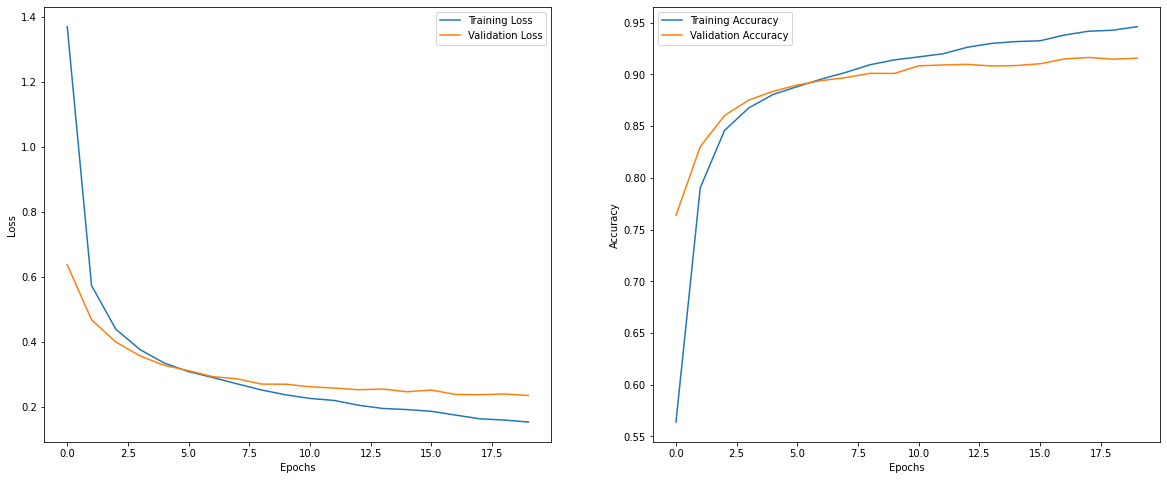

In [18]:
def plot_curve(hist):
    """Plot a curve of one or more classification metrics vs. epoch."""  
    # list_of_metrics should be one of the names shown in:
    # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

    epochs = hist.epoch
    f, ax = plt.subplots(ncols=2, figsize=(20,8))
    ax[0].plot(epochs, hist.history['loss'], label='Training Loss')
    ax[0].plot(epochs, hist.history['val_loss'], label='Validation Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend()
    ax[1].plot(epochs, hist.history['accuracy'], label='Training Accuracy')
    ax[1].plot(epochs, hist.history['val_accuracy'], label='Validation Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()
plot_curve(history_2)

In [19]:
#Use the test data set to check the accuracy of the model1
print("\n Evaluate the new model on the test set:")
result = model1.evaluate(x=[x_test1,x_test2], y=test_labels, batch_size=4000)

for item in zip(model1.metrics_names, result):
    print (item[0], np.round(item[1], 3))


 Evaluate the new model on the test set:
3/3 [==============================] - 1s 129ms/step - loss: 0.2454 - accuracy: 0.9143
loss 0.245
accuracy 0.914
